# Signal prosessing of ultrasound pulses with ultrasound attenuation spectra and phase velocity calcualtion

In [1]:
import numpy as np 
from scipy import fftpack 
import pandas as pd
from scipy import signal
from matplotlib import pyplot as plt

In [2]:
data =  pd.read_excel (r'ALL.xlsx')
print(data)

      castor  pre-emulsion  emulsion  after heating
0         -3            -2   -2.7500        -2.9375
1         -2            -1   -1.4375        -1.3125
2          2             1    1.4375         1.3125
3          3             3    3.0000         3.0000
4          2             2    2.3750         2.4375
...      ...           ...       ...            ...
9995       0             0    0.1875         0.0625
9996       0             0    0.2500         0.1250
9997       0             0    0.3750         0.0000
9998       0             0    0.2500         0.0625
9999       0             0    0.2500         0.0625

[10000 rows x 4 columns]


### Filtering the first pulse of reference system (castor oil)

10000


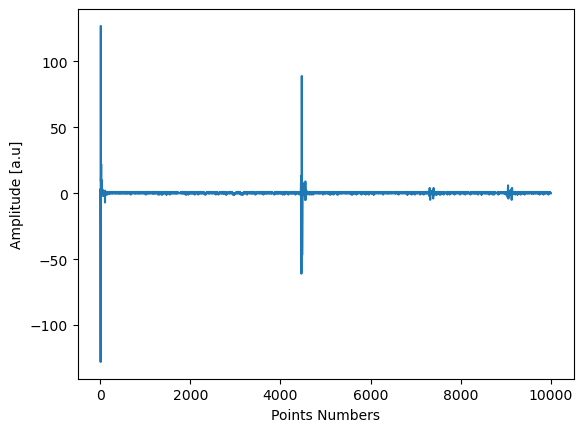

In [3]:
##Read the castor oil pulse
castor= data['castor']

##Plot the first pulse
plt.plot(castor)
plt.xlabel('Points Numbers')
plt.ylabel('Amplitude [a.u]')

## Determined the longth of the data
print(len(castor))

#Export the first pulse
PulseC = pd.DataFrame(castor)
PulseC.to_csv(" castor pulse2 .csv")

Text(0, 0.5, 'Amplitude [a.u]')

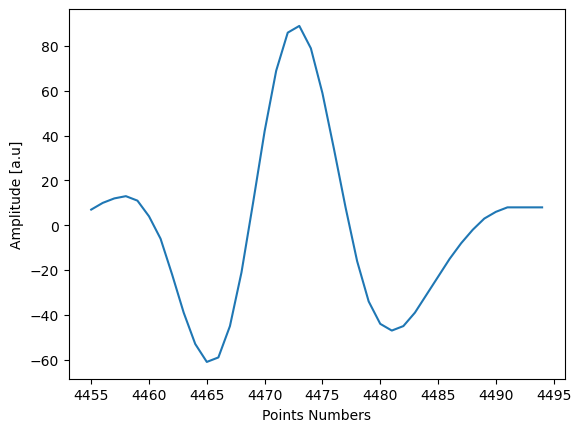

In [4]:
X1c = 4455
X2c = 4495
pc= castor[X1c:X2c]
x1c = np.arange(0,X1c,1)
x2c = np.arange(X2c,10000,1)
zac = np.zeros(len(x1c))
zbc = np.zeros(len(x2c))
plt.plot(pc)
plt.xlabel('Points Numbers')
plt.ylabel('Amplitude [a.u]')

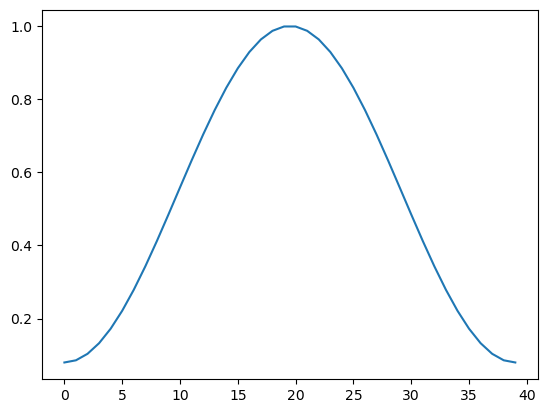

In [5]:
humwinc = signal.hamming(len(pc))
plt.plot(humwinc)

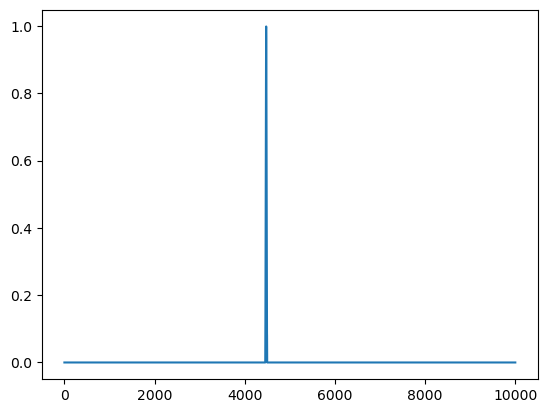

In [6]:
zeroTowinc = np.append(zac,humwinc)
zeroTowinTozeroc = np.append(zeroTowinc,zbc)
plt.plot(zeroTowinTozeroc)

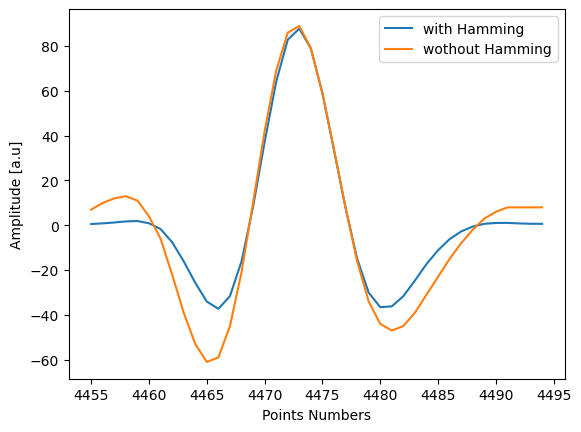

In [7]:
Finalc = castor*zeroTowinTozeroc
#plt.plot(window2)
slicFc = Finalc[X1c:X2c]
plt.plot(slicFc,label='with Hamming')
slicbc = castor[X1c:X2c]
plt.plot(slicbc, label='wothout Hamming')
plt.xlabel('Points Numbers')
plt.ylabel('Amplitude [a.u]')
plt.legend()

### Fast Fourier transform analysis

10000


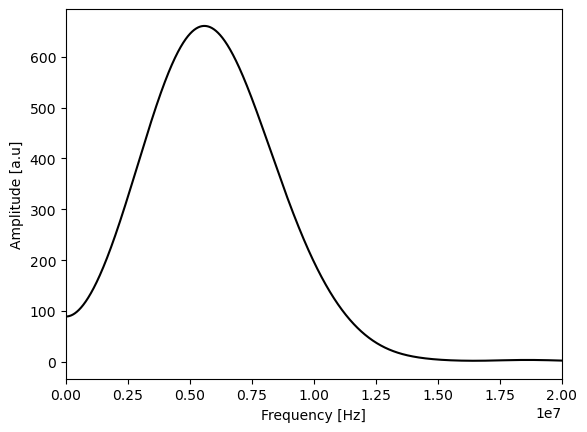

In [8]:
#Fast Fourier transform (FFT)
n = len(Finalc)
fhatc = np.fft.fft(Finalc,n) #compute the FFT
AMPc = abs(fhatc)           #Amplitude spectrum 
freq = (1/(10000*0.01))*np.arange(n)*10**6  #creat x-axis of frequency vector
L = np.arange(1,np.floor(n/2),dtype='int') 

#Plot Data
plt.plot(freq[L],AMPc[L],color='k',label='C')
plt.xlim(0,20000000)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [a.u]')

#Exprot data
F = pd.DataFrame(freq)
F.to_csv("frequency1.csv")
FFT = pd.DataFrame(AMPc)
FFT.to_csv("FFT-castor.csv")
print(len(AMPc))

### Filtering the second pulse of magentic emulsion

10000


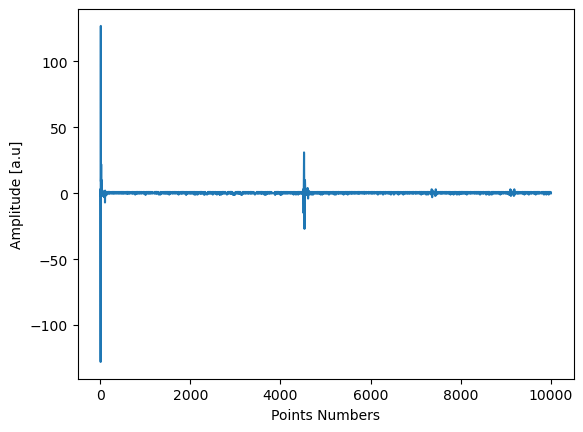

In [13]:
##Reading the seconds pulse of the system
Pre_emulsion= data['pre-emulsion']

##plot the pulse
plt.plot(Pre_emulsion)
plt.xlabel('Points Numbers')
plt.ylabel('Amplitude [a.u]')

##check the longht of the pulse
print(len(Pre_emulsion))

##Export thr data
#PulseS = pd.DataFrame(silicone)
#PulseS.to_csv(" PE pulse2 .csv")

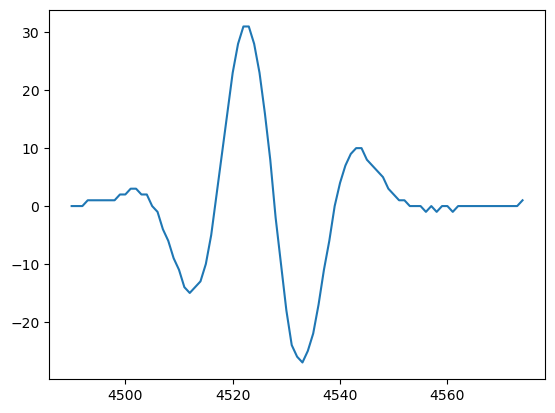

In [15]:
X1s = 4490
X2s = 4575
ps= Pre_emulsion[X1s:X2s]
x1s = np.arange(0,X1s,1)
x2s = np.arange(X2s,10000,1)
zas = np.zeros(len(x1s))
zbs = np.zeros(len(x2s))
plt.plot(ps)

85


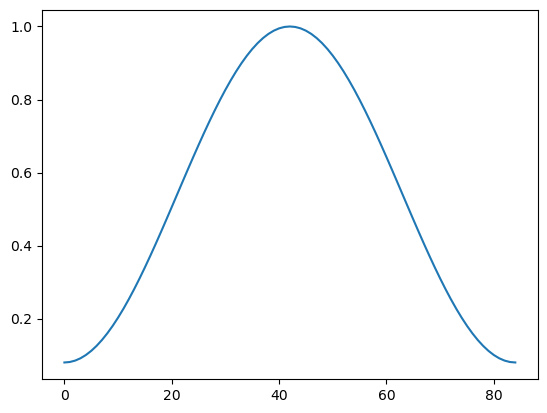

In [16]:
humwins = signal.hamming(len(ps))
plt.plot(humwins)
print(len(ps))

10000


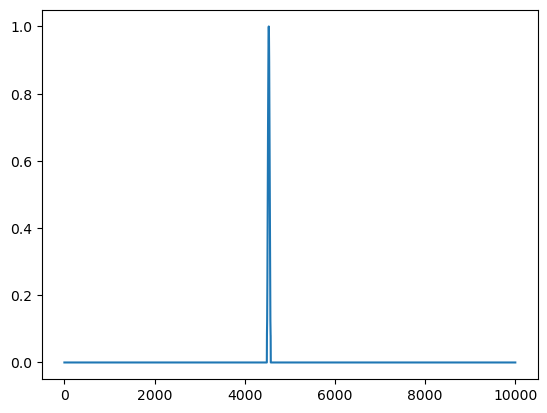

In [17]:
zeroTowins = np.append(zas,humwins)
zeroTowinTozeros = np.append(zeroTowins,zbs)
plt.plot(zeroTowinTozeros)
print(len(zeroTowinTozeros))

Text(0, 0.5, 'Amplitude [a.u]')

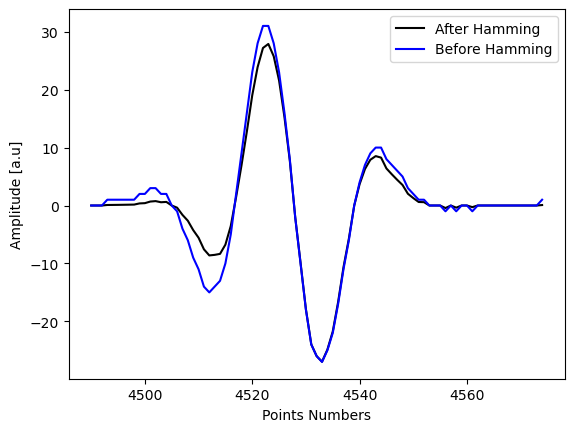

In [21]:
Finals = Pre_emulsion*zeroTowinTozeros
#plt.plot(window2)
slicFs = Finals[X1s:X2s]
plt.plot(slicFs,color='k',label='After Hamming')
slicbs = Pre_emulsion[X1s:X2s]
plt.plot(slicbs,color='b',label='Before Hamming')
plt.legend()
plt.xlabel('Points Numbers')
plt.ylabel('Amplitude [a.u]')

10000


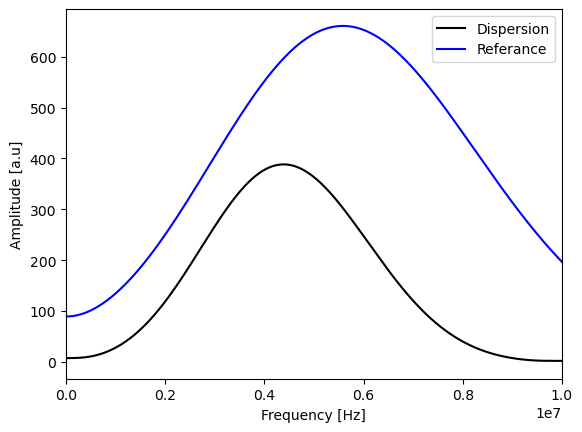

In [23]:
#Fast Fourier transform (FFT)
n = len(Finals)
fhats = np.fft.fft(Finals,n) #compute the FFT
AMPs = abs(fhats)           #Power spectrum densoty
freq = (1/(10000*0.01))*np.arange(n)*10**6#creat x-axis of freq
freq1 = (1/(10000*0.01))*np.arange(n)#creat x-axis of freq
L = np.arange(1,np.floor(n/2),dtype='int') 

##plot data
plt.plot(freq[L],AMPs[L],color='k',label='Dispersion')
plt.plot(freq[L],AMPc[L],color='b',label='Referance')
plt.legend()
plt.xlim(0,10000000)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [a.u]')


##Export the results
F = pd.DataFrame(freq1)
F.to_csv("Frequency MHz.txt", index=False, sep='\t')
FFT = pd.DataFrame(AMPs)
FFT.to_csv("FFT-after heating.csv")
print(len(AMPs))

Text(0, 0.5, 'Ultrasound attenaution [Np/m]')

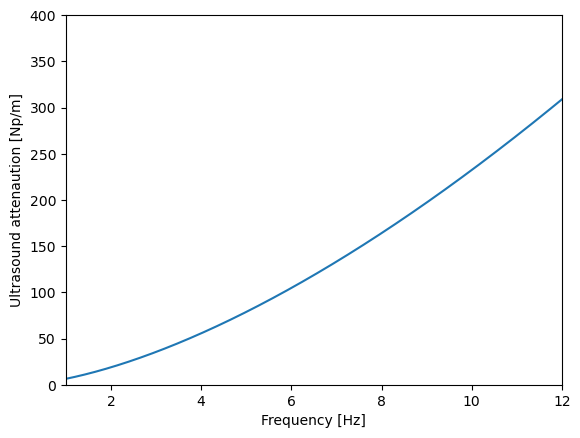

In [57]:
##power_low function of the castor oil
def calculate_P(n):
    P = 6.4 * n**1.56
    return P
n = freq1  
result_P = calculate_P(n)

##Ploting the result
plt.plot(freq1,result_P)
plt.axis([1,12, 0, 400])
plt.xlabel('Frequency [Hz]')
plt.ylabel('Ultrasound attenaution [Np/m]')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


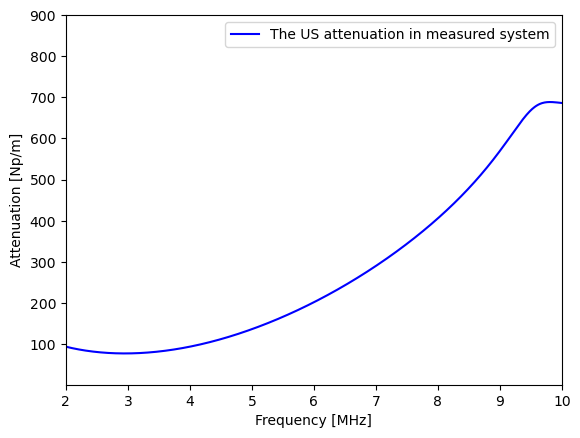

In [59]:
##Ultrasound spectra calcuations
alphaBMF =result_P+(np.log((AMPc/AMPs)))/0.01

##Plot the results
#plt.plot(freq[L],alphaBMF[L],color='b',label='Attenuation')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Attenuation [Np/m]')
plt.legend()
plt.plot(freq1[L],alphaBMF[L],color='b',label='The US attenuation in measured system')
plt.axis([2,10, 1, 900])
plt.legend()
plt.show()

##Export the Data
A1 = pd.DataFrame(alphaBMF)
A1.to_csv("attenuation_in_after heating.txt", index=False, sep='\t')
#plt.savefig('Polystyrene disperesed water.png',dpi=300)

## Ultrasound Phase velocity calcualtion

[0.000e+00 1.000e-02 2.000e-02 ... 9.997e+01 9.998e+01 9.999e+01]


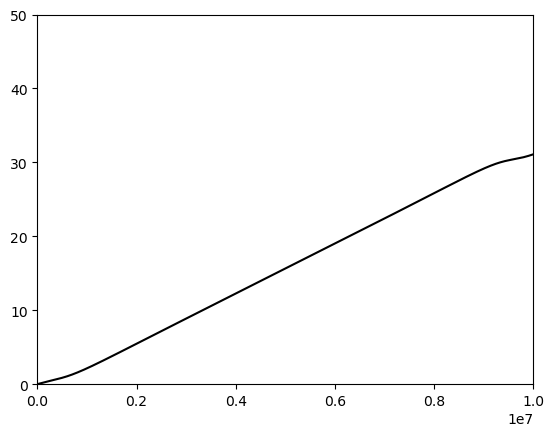

In [70]:
##Phase shift determination
anglec = np.angle(fhatc)
angles = np.angle (fhats)
ang = np.unwrap(anglec)-np.unwrap(angles)

##frequency vector
freqh = (1/(10000*0.01))*np.arange(10000)*10**6
 

##plot the results
plt.plot(freqh[L],ang[L],color='k',label='C')
plt.xlim(0,10000000)
plt.ylim(0,50)
##Export the data
#F = pd.DataFrame(freq)
#F.to_csv("frequency1.csv")],freq[200])
print(n)


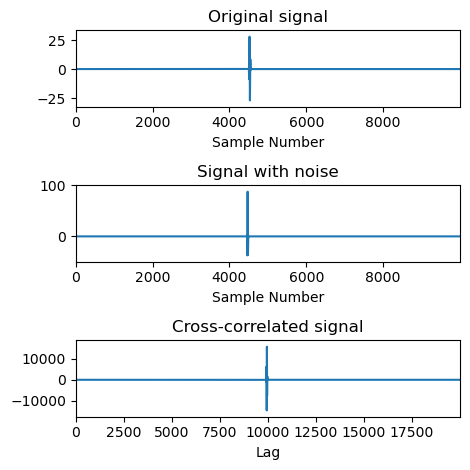

15704.771786865354
0.00015704771786865352


In [73]:
sig = Finals
sig_noise = Finalc
corr = signal.correlate(sig_noise, sig)
lags = signal.correlation_lags(len(sig), len(sig_noise))
corrm = np.max(corr)
t_shift = corrm*0.01*10**-6

fig, (ax_orig, ax_noise, ax_corr) = plt.subplots(3, 1, figsize=(4.8, 4.8))
ax_orig.plot(sig)
ax_orig.set_title('Original signal')
ax_orig.set_xlabel('Sample Number')
ax_noise.plot(sig_noise)
ax_noise.set_title('Signal with noise')
ax_noise.set_xlabel('Sample Number')
ax_corr.plot( corr)
ax_corr.set_title('Cross-correlated signal')
ax_corr.set_xlabel('Lag')
ax_orig.margins(0, 0.1)
ax_noise.margins(0, 0.1)
ax_corr.margins(0, 0.1)
fig.tight_layout()
plt.show()


print(corrm)
print(t_shift)

In [74]:
##group velcoty calcuation
L = 0.01
dt = 0.01
vg = L/(L/1450-t_shift*dt*10**-6)
#vg1 = L/(L/1484-7.6*10**-6*dt)
print(vg)

1450.000330192902


In [75]:
ft=5*10**6 #in Hz
fs=100*10**6 #in Hz
df=(1/(10000*0.01))*10**6 #in Hz
fi = 2*np.pi*freqh[round(ft/df)]*L*(1/1450-1/vg)
print(fi)

4.933799565687911e-05


In [76]:
nf = round((fi-ang[round(ft/df)]))/(2)/(np.pi)
print(nf)

-2.5464790894703255


[   0.           38.27634307   74.66358827 ... 1564.46755654 1564.46220672
 1564.45686479]


/var/folders/f6/hdchpj6x0r762gr735l7mcch0000gn/T/ipykernel_5046/3314871953.py:2: RuntimeWarning: divide by zero encountered in divide
  vs = 1/((1/1450)-(ang+nf*2*np.pi)/(2*np.pi*L*freqh))


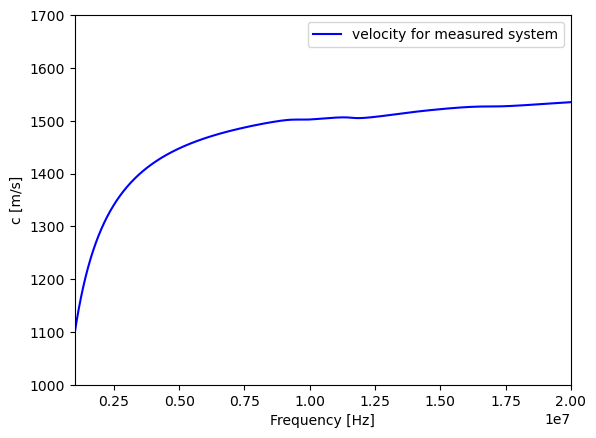

In [80]:
##Phase velocity equation
vs = 1/((1/1450)-(ang+nf*2*np.pi)/(2*np.pi*L*freqh))
print(vs)

##Plot the result
plt.plot(freqh ,vs,color='b',label='velocity for measured system')
plt.xlabel('Frequency [Hz]')
plt.ylabel('c [m/s]')
plt.legend()
plt.axis([1000000,20000000,1000,1700])


#Export the data
A1 = pd.DataFrame(vs)
A1.to_csv("velocity_after heating.txt", index=False, sep='\t')
#plt.savefig('US velocity for pre-emulsion besed on castor.png',dpi=300)